In [2]:
#Data.csv

**Step 1: Importing the libraries**

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

**Step 2: Importing dataset**

In [7]:
df = pd.read_csv('Data.csv')

In [8]:
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [9]:
df.shape

(10, 4)

In [10]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

**Step 3: Handling the missing data**

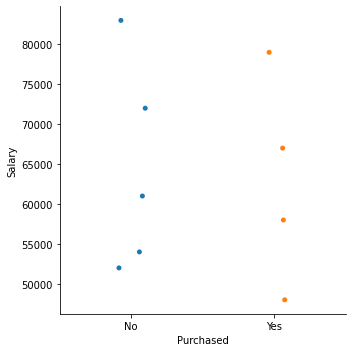

In [11]:
sns.catplot(data=df, x="Purchased", y="Salary")

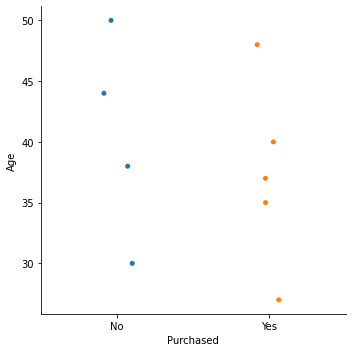

In [12]:
sns.catplot(data=df, x="Purchased", y="Age")

In [18]:


df[['Age','Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [25]:
#Obtaining the missing values:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Age','Salary']] = imp.fit_transform(df[['Age','Salary']])
df[['Age','Salary']] = df[['Age','Salary']].round(2)

In [27]:
df.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.00,No
1,Spain,27.0,48000.00,Yes
2,Germany,30.0,54000.00,No
3,Spain,38.0,61000.00,No
4,Germany,40.0,63777.78,Yes


**Step 4: Encoding categorical data**

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

transformer = make_column_transformer(
    (OneHotEncoder(), ['Country']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())


In [42]:
transformed_df

,onehotencoder__Country_France,onehotencoder__Country_Germany,onehotencoder__Country_Spain,remainder__Age,remainder__Salary,remainder__Purchased
0,1.0,0.0,0.0,44.0,72000.0,No
1,0.0,0.0,1.0,27.0,48000.0,Yes
2,0.0,1.0,0.0,30.0,54000.0,No
3,0.0,0.0,1.0,38.0,61000.0,No
4,0.0,1.0,0.0,40.0,63777.78,Yes
5,1.0,0.0,0.0,35.0,58000.0,Yes
6,0.0,0.0,1.0,38.78,52000.0,No
7,1.0,0.0,0.0,48.0,79000.0,Yes
8,0.0,1.0,0.0,50.0,83000.0,No
9,1.0,0.0,0.0,37.0,67000.0,Yes


**Step 5: Creating a dummy variable**

In [48]:
X = pd.get_dummies(df.drop(columns = ['Purchased'],axis =1 ) )
X.head(5)

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.0,72000.00,1,0,0
1,27.0,48000.00,0,0,1
2,30.0,54000.00,0,1,0
3,38.0,61000.00,0,0,1
4,40.0,63777.78,0,1,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [49]:
y =df['Purchased']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Step 7: Feature Scaling**

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
scaled = scaler.transform(X_train)
scaled = pd.DataFrame(scaled)

In [60]:
scaled

,0,1,2,3,4
0,1.000000,1.000000,1.0,0.0,0.0
1,0.000000,0.074074,0.0,1.0,0.0
2,0.388889,0.555556,1.0,0.0,0.0
3,0.555556,0.436214,0.0,1.0,0.0
4,0.444444,0.333333,0.0,0.0,1.0
5,0.487778,0.000000,0.0,0.0,1.0
